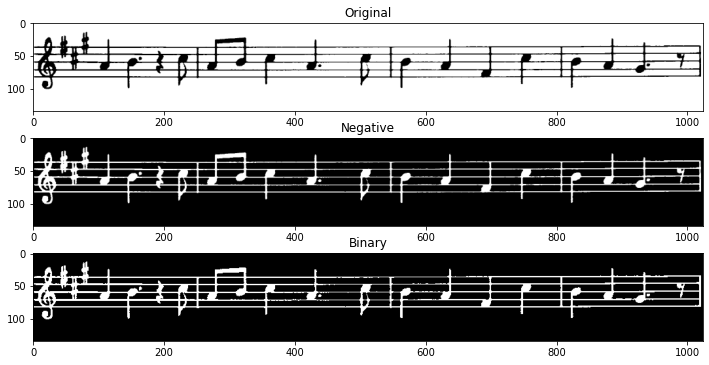

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt 

gray_image = cv2.imread('./images/notes.png', 0)
negative_image = cv2.bitwise_not(gray_image)
binary_image = cv2.adaptiveThreshold(negative_image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, \
                                            cv2.THRESH_BINARY, 15, -2)

plt.figure(figsize=[12,6])
plt.subplot(311);plt.imshow(gray_image, cmap='gray');plt.title('Original');
plt.subplot(312);plt.imshow(negative_image, cmap='gray');plt.title('Negative');
plt.subplot(313);plt.imshow(binary_image, cmap='gray');plt.title('Binary');

In [6]:
cols = binary_image.shape[1]
horizontal_size = cols // 30

horizontal_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (horizontal_size, 1))
print(horizontal_kernel)

[[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]]


Text(0.5, 1.0, 'Horizontal Lines of the image')

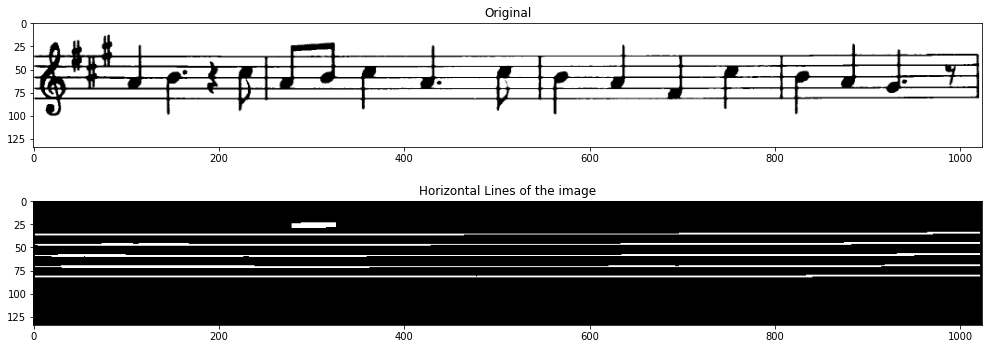

In [7]:
horizontal = cv2.morphologyEx(binary_image, cv2.MORPH_OPEN, horizontal_kernel)

plt.figure(figsize=[17,6])
plt.subplot(211);plt.imshow(gray_image, cmap='gray');plt.title('Original');
plt.subplot(212);plt.imshow(horizontal, cmap='gray');plt.title('Horizontal Lines of the image')

In [23]:
rows = binary_image.shape[0]
vertical_size = rows // 30

vertical_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, vertical_size))
print(vertical_kernel)

[[1]
 [1]
 [1]
 [1]]


Text(0.5, 1.0, 'Horizontal Lines of the image')

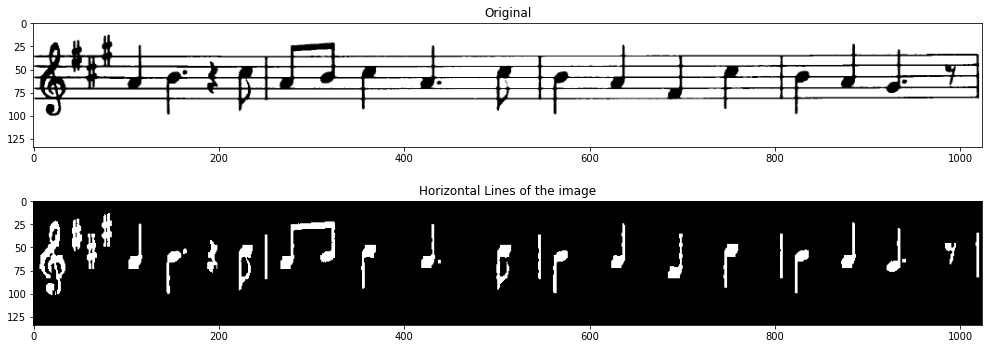

In [11]:
horizontal = cv2.morphologyEx(binary_image, cv2.MORPH_OPEN, vertical_kernel)

plt.figure(figsize=[17,6])
plt.subplot(211);plt.imshow(gray_image, cmap='gray');plt.title('Original');
plt.subplot(212);plt.imshow(horizontal, cmap='gray');plt.title('Horizontal Lines of the image')

Text(0.5, 1.0, 'Horizontal Lines of the image')

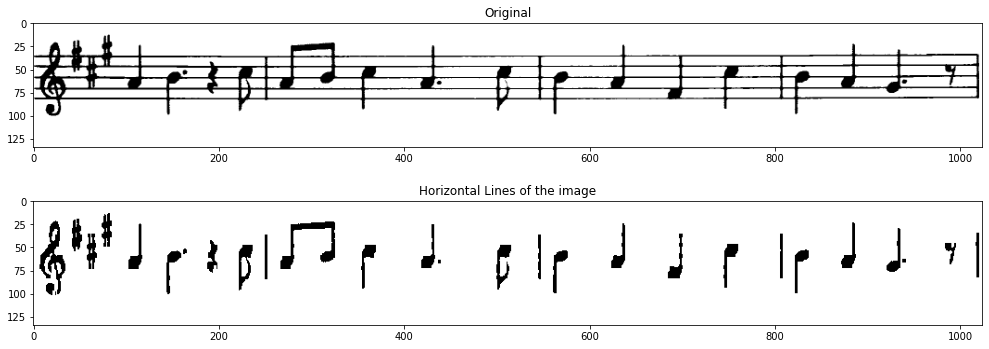

In [15]:
raw_result = cv2.bitwise_not(horizontal)

plt.figure(figsize=[17,6])
plt.subplot(211);plt.imshow(gray_image, cmap='gray');plt.title('Original');
plt.subplot(212);plt.imshow(raw_result, cmap='gray');plt.title('Horizontal Lines of the image')

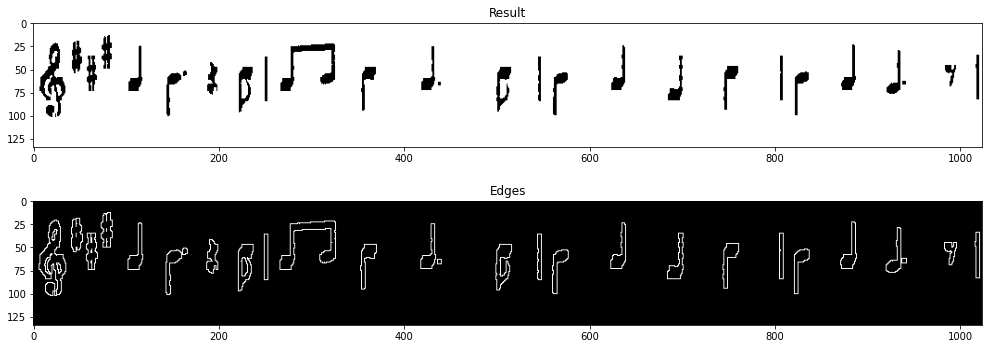

In [16]:
edges = cv2.adaptiveThreshold(raw_result, 255, cv2.ADAPTIVE_THRESH_MEAN_C, \
                                        cv2.THRESH_BINARY, 3, -2)

plt.figure(figsize=[17,6])
plt.subplot(211);plt.imshow(raw_result, cmap='gray');plt.title('Result');
plt.subplot(212);plt.imshow(edges, cmap='gray');plt.title('Edges');

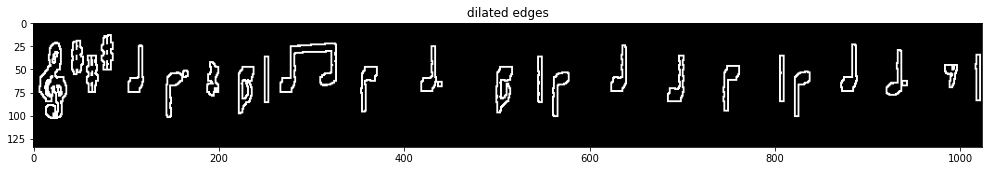

In [17]:
kernel = np.ones((2,2), np.uint8)
edges = cv2.dilate(edges, kernel)

plt.figure(figsize=[17,6])
plt.imshow(edges, cmap='gray');plt.title('dilated edges');

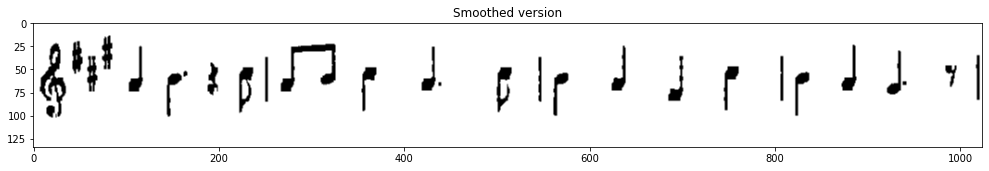

In [18]:
smooth = cv2.blur(raw_result, (2,2))

plt.figure(figsize=[17,6])
plt.imshow(smooth, cmap='gray');plt.title('Smoothed version');

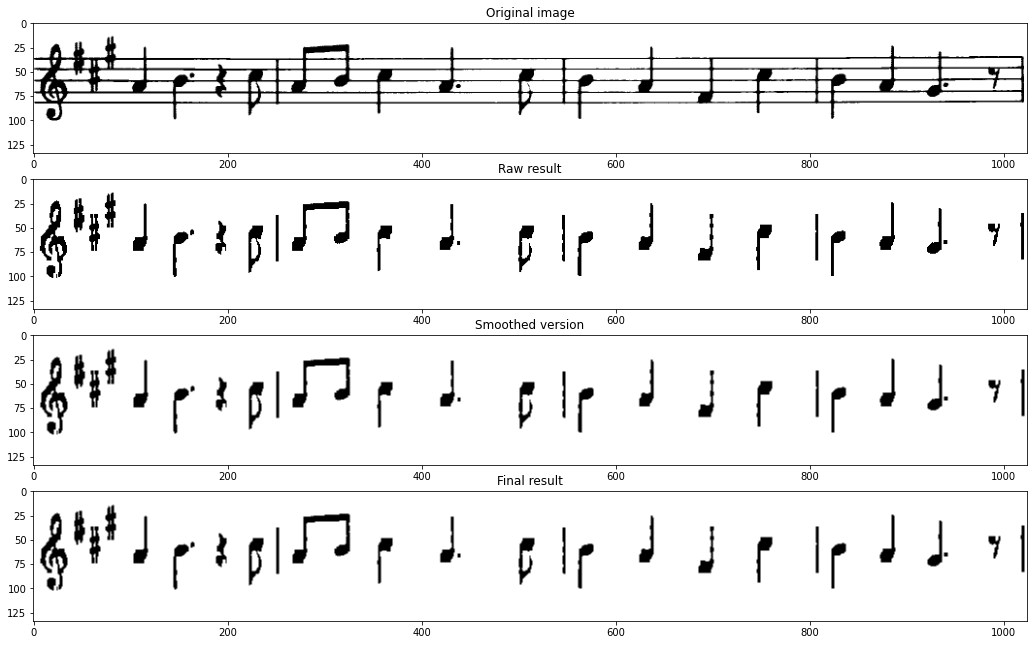

In [21]:
(rows, cols) = np.where(edges != 0)
final_result = np.copy(raw_result)
final_result[rows, cols] = smooth[rows, cols]

plt.figure(figsize=[18, 11])
plt.subplot(411);plt.imshow(gray_image, cmap='gray');plt.title('Original image');
plt.subplot(412);plt.imshow(raw_result, cmap='gray');plt.title('Raw result');
plt.subplot(413);plt.imshow(smooth, cmap='gray');plt.title('Smoothed version');
plt.subplot(414);plt.imshow(final_result, cmap='gray');plt.title('Final result');